In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
#read the dataset
df=pd.read_csv('ccdefault.csv')

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
#drop "ID" column
df=df.drop(["ID"],axis=1)

In [5]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
#Check for missing values
df.isnull().describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000


In [8]:
#Creat feature variables and target variable
X=df.drop(["DEFAULT"],axis=1)
y=df["DEFAULT"]

In [9]:
#Check the dimensions of X and y
X.shape

(30000, 23)

In [10]:
y.shape

(30000,)

In [11]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [12]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: DEFAULT, dtype: int64

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
#normalisation of data
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [15]:
X.shape

(30000, 23)

In [16]:
X[0:5]

array([[-1.13672015,  0.81016074,  0.18582826, -1.05729503, -1.24601985,
         1.79456386,  1.78234817, -0.69666346, -0.66659873, -1.53004603,
        -1.48604076, -0.64250107, -0.64739923, -0.66799331, -0.67249727,
        -0.66305853, -0.65272422, -0.34194162, -0.22708564, -0.29680127,
        -0.30806256, -0.31413612, -0.29338206],
       [-0.3659805 ,  0.81016074,  0.18582826,  0.85855728, -1.02904717,
        -0.87499115,  1.78234817,  0.1388648 ,  0.18874609,  0.23491652,
         1.99231551, -0.65921875, -0.66674657, -0.63925429, -0.62163594,
        -0.60622927, -0.59796638, -0.34194162, -0.21358766, -0.24000461,
        -0.24422965, -0.31413612, -0.18087821],
       [-0.59720239,  0.81016074,  0.18582826,  0.85855728, -0.16115646,
         0.01486052,  0.1117361 ,  0.1388648 ,  0.18874609,  0.23491652,
         0.25313738, -0.29855966, -0.49389911, -0.48240819, -0.44973025,
        -0.41718767, -0.39162956, -0.25029158, -0.19188673, -0.24000461,
        -0.24422965, -0.2486

In [17]:
#Split into training set and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [19]:
RF=RandomForestClassifier()
param_grid={'n_estimators':[10,25,50,100,200,300,500]}
gs=GridSearchCV(RF,param_grid,scoring='accuracy',cv=10,n_jobs=-1)
gs.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [20]:
gs.best_score_


0.8173703703703704

In [21]:
gs.best_params_

{'n_estimators': 300}

In [22]:
gs.cv_results_

{'mean_fit_time': array([ 0.9986438 ,  2.42734573,  4.97463303,  9.58861246, 16.60440774,
        26.89017093, 44.56891282]),
 'std_fit_time': array([0.05097433, 0.06963411, 0.29494357, 0.73484412, 0.69904742,
        2.11195667, 2.27294826]),
 'mean_score_time': array([0.01648607, 0.03241057, 0.06167014, 0.09434845, 0.18361001,
        0.28334248, 0.52393587]),
 'std_score_time': array([0.00538577, 0.00645137, 0.01131207, 0.01162375, 0.02002894,
        0.03105377, 0.11102469]),
 'param_n_estimators': masked_array(data=[10, 25, 50, 100, 200, 300, 500],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10},
  {'n_estimators': 25},
  {'n_estimators': 50},
  {'n_estimators': 100},
  {'n_estimators': 200},
  {'n_estimators': 300},
  {'n_estimators': 500}],
 'split0_test_score': array([0.80488708, 0.81192151, 0.81488338, 0.81451314, 0.81488338,
        0.81599408, 0.81599408]),
 'split1_tes

In [23]:
rf_best=RandomForestClassifier(n_estimators=300,random_state=1)
rf_best.fit(X_train,y_train)
print("Training accuracy: ",rf_best.score(X_train,y_train))

Training accuracy:  0.9994074074074074


In [24]:
print("Test accuracy:", rf_best.score(X_test,y_test))

Test accuracy: 0.8206666666666667


In [32]:
feat_labels=df.columns[1:]

# Extract feature importances
importances=rf_best.feature_importances_

# Get the indices of the largest to smallest feature importances
indices=np.argsort(importances)[::-1]

print(importances)

[0.05976824 0.01206031 0.02045878 0.01416078 0.06656239 0.09588308
 0.04785285 0.02644908 0.0225632  0.02010975 0.01862183 0.06049469
 0.05425098 0.05210615 0.0501679  0.05020598 0.05056022 0.05060506
 0.0477349  0.04678288 0.04303391 0.04352402 0.04604302]


In [40]:
for i in range(X_train.shape[1]):
     print(i + 1,feat_labels[indices[i]],importances[indices[i]])

1 PAY_2 0.09588307792619458
2 PAY_0 0.06656239074295348
3 BILL_AMT2 0.06049469489240326
4 SEX 0.059768239549815375
5 BILL_AMT3 0.0542509827314021
6 BILL_AMT4 0.05210615348155963
7 PAY_AMT2 0.0506050561968281
8 PAY_AMT1 0.05056022330295286
9 BILL_AMT6 0.05020597959731049
10 BILL_AMT5 0.05016790496482403
11 PAY_3 0.047852850301472634
12 PAY_AMT3 0.0477348996027969
13 PAY_AMT4 0.046782878796216606
14 DEFAULT 0.0460430194394684
15 PAY_AMT6 0.043524015083079286
16 PAY_AMT5 0.04303391069887032
17 PAY_4 0.026449083728151853
18 PAY_5 0.02256319739854449
19 MARRIAGE 0.020458776235478197
20 PAY_6 0.020109748532938374
21 BILL_AMT1 0.018621831495191633
22 AGE 0.014160778389563613
23 EDUCATION 0.012060306911983816


In [43]:
for i in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (i + 1, 20,feat_labels[indices[i]],importances[indices[i]]))

 1) PAY_2                0.095883
 2) PAY_0                0.066562
 3) BILL_AMT2            0.060495
 4) SEX                  0.059768
 5) BILL_AMT3            0.054251
 6) BILL_AMT4            0.052106
 7) PAY_AMT2             0.050605
 8) PAY_AMT1             0.050560
 9) BILL_AMT6            0.050206
10) BILL_AMT5            0.050168
11) PAY_3                0.047853
12) PAY_AMT3             0.047735
13) PAY_AMT4             0.046783
14) DEFAULT              0.046043
15) PAY_AMT6             0.043524
16) PAY_AMT5             0.043034
17) PAY_4                0.026449
18) PAY_5                0.022563
19) MARRIAGE             0.020459
20) PAY_6                0.020110
21) BILL_AMT1            0.018622
22) AGE                  0.014161
23) EDUCATION            0.012060


In [44]:
for i in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (i + 1, 30,feat_labels[indices[i]],importances[indices[i]]))

 1) PAY_2                          0.095883
 2) PAY_0                          0.066562
 3) BILL_AMT2                      0.060495
 4) SEX                            0.059768
 5) BILL_AMT3                      0.054251
 6) BILL_AMT4                      0.052106
 7) PAY_AMT2                       0.050605
 8) PAY_AMT1                       0.050560
 9) BILL_AMT6                      0.050206
10) BILL_AMT5                      0.050168
11) PAY_3                          0.047853
12) PAY_AMT3                       0.047735
13) PAY_AMT4                       0.046783
14) DEFAULT                        0.046043
15) PAY_AMT6                       0.043524
16) PAY_AMT5                       0.043034
17) PAY_4                          0.026449
18) PAY_5                          0.022563
19) MARRIAGE                       0.020459
20) PAY_6                          0.020110
21) BILL_AMT1                      0.018622
22) AGE                            0.014161
23) EDUCATION                   

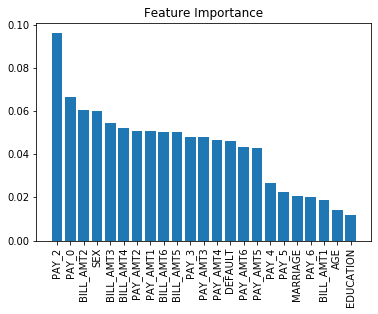

In [58]:
# Create tick labels 
labels = np.array(feat_labels)[indices]

# Set the tick lables to be the feature names
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),importances[indices],tick_label=labels)
plt.xticks(rotation=90)
plt.show()